In [37]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [38]:
study_folder = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\ParamStudies\Frames_3cam_rotY400_ObjectCenter"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

In [39]:
PSets_Eval.index = PSets_Eval["images"] / PSets_Info["cam_number"]

Berechne Fehler in den morphologischen Größen und füge sie dem Evaluierungsdatensatz hinzu

In [40]:
sphericity_error_perc = (PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]) / PSets_Eval["sphericity_ref"]*100
vol_error_perc = (PSets_Eval["volume_rec"] - PSets_Eval["volume_ref"]) / PSets_Eval["volume_ref"]*100
PSets_Eval["sphericity_error_perc"] = sphericity_error_perc; PSets_Eval["vol_error_perc"] = vol_error_perc; 

Berechne die Positionsfehlerquote

In [41]:
r_PFQ_perc  = PSets_Eval["cam_outliers"] / PSets_Eval["rec_cams"] *100
PSets_Eval["r_PFQ_perc"] = r_PFQ_perc; 

Verkleinerer den Evaluierungsdatensatz auf die relevanten Größen

In [42]:
PSets_Eval["cam_mean_error_perc"]  = PSets_Eval["cam_mean_rel_error"]*100
PSets_Eval_small = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc"]]
PSets_Eval_small_qual = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc","quality_index"]]

Plotte Auswertungsgröße über die varrierten Größe

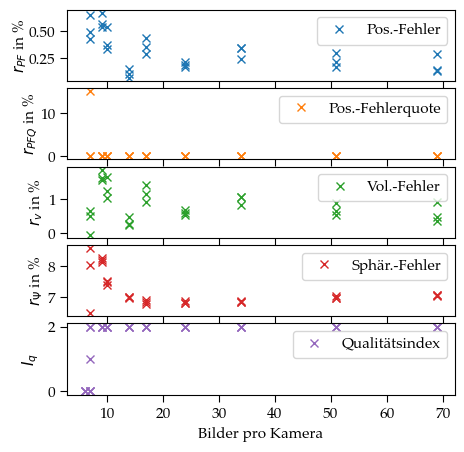

In [43]:
#PSets_Eval_small_qual.index = PSets_Eval["images"] / PSets_Info["cam_number"]
#PSets_Eval.index = PSets_Eval["images"] / PSets_Info["cam_number"]
#PSets_Eval_small.index = PSets_Eval["images"] / PSets_Info["cam_number"]

axes = PSets_Eval_small_qual.plot(subplots=True, figsize=(5, 5), style='x')
#plt.xticks([2, 3, 4, 5, 6])
plt.xlabel("Bilder pro Kamera")
axes[0].legend(["Pos.-Fehler"]); axes[0].set_ylabel("$r_{PF}$ in %",labelpad=0)
axes[1].legend(["Pos.-Fehlerquote"]); axes[1].set_ylabel("$r_{PFQ}$ in %",labelpad=0)
axes[2].legend(["Vol.-Fehler"]); axes[2].set_ylabel("$r_{v}$ in %",labelpad = 2)
axes[3].legend(["Sphär.-Fehler"]); axes[3].set_ylabel("$r_\Psi$ in %",labelpad=2)
axes[4].legend(["Qualitätsindex"]); axes[4].set_ylabel("$I_q$",labelpad=5)
plt.subplots_adjust(hspace=0.1)
plt.savefig("distance_eval_5subplots.svg", format="svg")
plt.show()


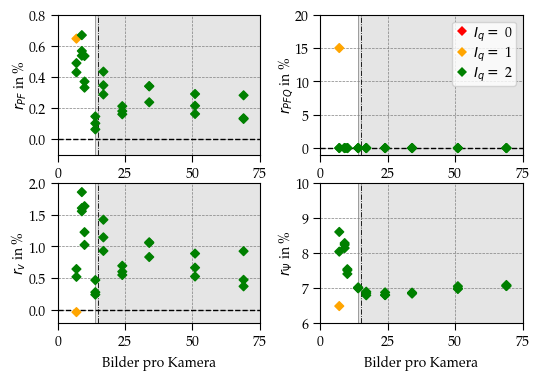

In [44]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
importlib.reload(sys.modules['Figures.plot_quality_critieria']) if 'Figures.plot_quality_critieria' in sys.modules else None
from Figures.plot_quality_critieria import plot_4_quality_criteria

savefig_folder = None # r"C:\Users\Tobias\Nextcloud\clientsync\UNI\Masterarbeit\Auswertung\Frames" #without image format
figsize = (6,4)
marker = "D"
markersize = 20
markersize_legend = markersize /3.8
grid = True
xticks = [0,25,50,75] # None
optimal_span = [14, 75] # None
labelpad = [0, 0, 0, 0]
one_decimal_place = False
font_size = 10
legend_loc = "upper right"
arrows_color = "black" # None: --> Farbe des Pfeils ist abhängig vom Qualitätsindex
y_limits = [(-0.1, 0.8), (-1, 20), (-0.2, 2), (6, 10)]
plot_x0_line = True
xlabel= "Bilder pro Kamera"
mark_base_case = 15

fig, ax = plot_4_quality_criteria(PSets_Eval_small_qual, savefig_folder, figsize, xlabel ,marker,markersize, 
                            arrows_color, font_size, labelpad, xticks, grid,
                            one_decimal_place, plot_x0_line, markersize_legend, legend_loc, optimal_span, y_limits,mark_base_case)


In [45]:
scatter = ax[0,0].collections[0]
data = scatter.get_offsets()
x_data = data[:, 0]
y_data = data[:, 1]
print("x-Daten:", x_data)
print("y-Daten:", y_data)

x-Daten: [-- -- -- -- -- -- 7.0 7.0 7.0 9.0 9.0 9.0 10.0 10.0 10.0 14.0 14.0 14.0
 17.0 17.0 17.0 24.0 24.0 24.0 34.0 34.0 34.0 51.0 51.0 51.0 69.0 69.0
 69.0]
y-Daten: [-- -- -- -- -- -- 0.48871414044208 0.6461080921401501 0.42935602794467004
 0.56690487979965 0.66860033970293 0.53639543026645 0.53448247521832
 0.37010171169561 0.33110244317104004 0.1457663101302 0.06277236472062
 0.10153301616980001 0.28732505144387 0.43395853181154004 0.34613584660476
 0.21200888271465002 0.15996951030931 0.18036196417071 0.33946772032945
 0.3409365955075 0.23713436940438 0.21424575368648 0.29030589259674
 0.16212498890114 0.28179468924171 0.13424023955143 0.12991658765311]


In [52]:
PSets_Eval

,Scaling_median,Scaling_std,Mesh2MeshDist_mean,Mesh2MeshDist_std,volume_ref,volume_rec,surface_ref,surface_rec,sphericity_ref,sphericity_rec,...,cam_std_rel_error,cam_outliers,cam_threshold,rec_cams,images,quality_index,sphericity_error_perc,vol_error_perc,r_PFQ_perc,cam_mean_error_perc
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,6,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,0.399611,0.000381,0.000045,0.000140,0.000011,0.000011,0.003591,0.003335,0.671746,0.725690,...,0.000985,0.0,0.01,20,21,2,8.030451,0.520718,0.0,0.488714
7.0,0.399644,0.000421,0.000062,0.000181,0.000011,0.000011,0.003591,0.003372,0.671746,0.715242,...,0.002830,3.0,0.01,20,21,1,6.475031,-0.033405,15.0,0.646108
7.0,0.399619,0.000362,0.000045,0.000136,0.000011,0.000011,0.003591,0.003321,0.671746,0.729477,...,0.000986,0.0,0.01,20,21,2,8.594163,0.643088,0.0,0.429356
9.0,0.401715,0.000149,0.000022,0.000114,0.000011,0.000011,0.003591,0.003353,0.671746,0.726998,...,0.000320,0.0,0.01,24,27,2,8.225101,1.600814,0.0,0.566905


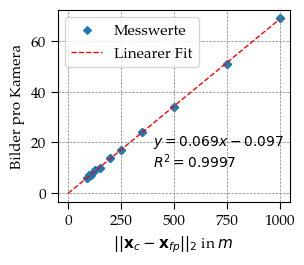

In [ ]:
# Aktuelles Verzeichnis in Jupyter-Notebook
parentparent_dir = Path.cwd().resolve().parent.parent
style_path = parentparent_dir / 'thesis.mplstyle'
# Stil anwenden
plt.style.use(str(style_path))

x = PSets_Info["cam_fps"]
y = y = PSets_Eval["images"].values / PSets_Info["cam_number"].values

fig, ax = plt.subplots(figsize=(3, 2.5))  # Erstellen einer Figur und eines Subplots
ax.scatter(x, y,marker="D",s=15,label = "Messwerte")  # Erstellen eines Scatter-Plots
ax.set_xlabel("$||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Bilder pro Kamera")  # Beschriftung der y-Achse
ax.grid(True)
#ax.set_xlim([0,1.05])
#ax.set_xticks([0, 0.2, 0.4, 0.6,0.8,1])
#ax.set_ylim([0,150])


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
x_poly = np.linspace(0,1000)
y_poly =  poly1d_fn(x_poly)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x_poly,y_poly, '--r',linewidth = 1,label= "Linearer Fit")


# # Calculate R-squared value
y_pred = poly1d_fn(x)
ss_res = np.sum((y - y_pred)** 2)  # Sum of squared residuals
ss_tot = np.sum((y - np.mean(y))** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Display the equation and R-squared on the plot
a, b = coef  # coefficients for y = ax + b
equation_text = f"$y = {a:.3f}x {'+' if b >= 0 else ''}{b:.3f}$\n$R^2 = {r_squared:.4f}$"

ax.text(400, 10, equation_text, fontsize=10, color="black")
plt.legend()
plt.savefig("NumberImages_fps.svg",bbox_inches="tight")
plt.show()  # Anzeigen des Plots

In [63]:
x = PSets_Info["cam_fps"]
y = PSets_Eval["images"] / PSets_Info["cam_number"] 
y

0.0      NaN
1.0      NaN
2.0      NaN
3.0      NaN
4.0      NaN
5.0      NaN
6.0      6.0
6.0      6.0
6.0      6.0
7.0      7.0
7.0      7.0
7.0      7.0
7.0      7.0
7.0      7.0
7.0      7.0
8.0      NaN
9.0      9.0
9.0      9.0
9.0      9.0
10.0    10.0
10.0    10.0
10.0    10.0
11.0     NaN
12.0     NaN
13.0     NaN
14.0    14.0
14.0    14.0
14.0    14.0
15.0     NaN
16.0     NaN
17.0    17.0
17.0    17.0
17.0    17.0
18.0     NaN
19.0     NaN
20.0     NaN
21.0     NaN
22.0     NaN
23.0     NaN
24.0    24.0
24.0    24.0
24.0    24.0
25.0     NaN
26.0     NaN
27.0     NaN
28.0     NaN
29.0     NaN
30.0     NaN
31.0     NaN
32.0     NaN
34.0     NaN
34.0     NaN
34.0     NaN
51.0     NaN
51.0     NaN
51.0     NaN
69.0     NaN
69.0     NaN
69.0     NaN
dtype: float64

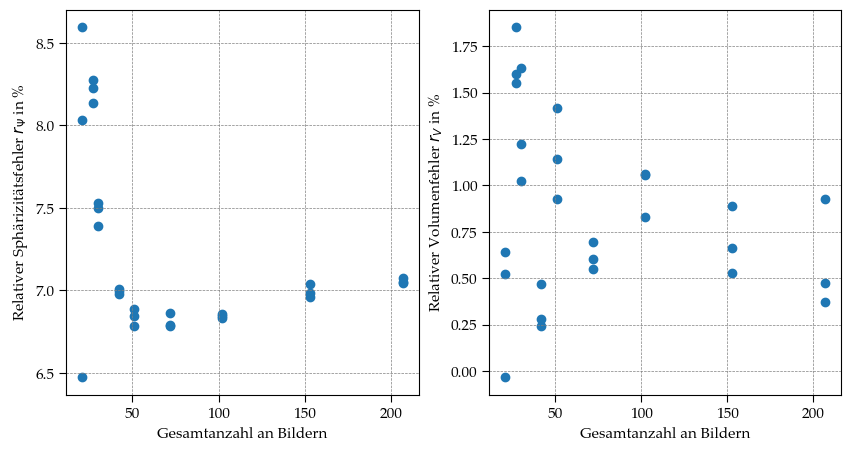

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(PSets_Eval["images"], PSets_Eval["sphericity_error_perc"], marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Gesamtanzahl an Bildern")
ax[0].set_ylabel("Relativer Sphärizitätsfehler $r_\Psi$ in %")
#ax[0].set_xlim([0,1])
#ax[0].set_ylim([4,14])

ax[1].scatter(PSets_Eval["images"], PSets_Eval["vol_error_perc"], marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Gesamtanzahl an Bildern")
ax[1].set_ylabel("Relativer Volumenfehler $r_V$ in %")
#ax[1].set_xlim([0,1])
#ax[1].set_ylim([-1,10])
plt.show()


Laufzeitanalyse

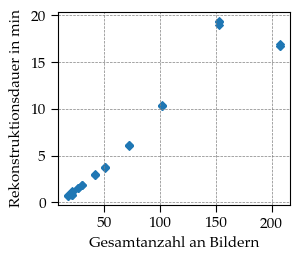

In [ ]:
fig, ax = plt.subplots(figsize=(3,2.5))  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="D",s=15)  # Erstellen eines Scatter-Plots
ax.set_xlabel("Gesamtanzahl an Bildern")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

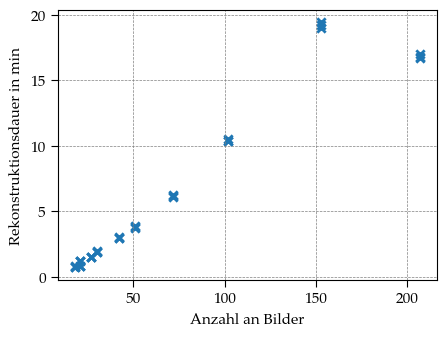

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Bilder")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

In [ ]:
PSets_Eval

,Scaling_median,Scaling_std,Mesh2MeshDist_mean,Mesh2MeshDist_std,volume_ref,volume_rec,surface_ref,surface_rec,sphericity_ref,sphericity_rec,...,cam_std_rel_error,cam_outliers,cam_threshold,rec_cams,images,quality_index,sphericity_error_perc,vol_error_perc,r_PFQ_perc,cam_mean_error_perc
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,6,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,0.399611,0.000381,0.000045,0.000140,0.000011,0.000011,0.003591,0.003335,0.671746,0.725690,...,0.000985,0.0,0.01,20,21,2,8.030451,0.520718,0.0,0.488714
7.0,0.399644,0.000421,0.000062,0.000181,0.000011,0.000011,0.003591,0.003372,0.671746,0.715242,...,0.002830,3.0,0.01,20,21,1,6.475031,-0.033405,15.0,0.646108
7.0,0.399619,0.000362,0.000045,0.000136,0.000011,0.000011,0.003591,0.003321,0.671746,0.729477,...,0.000986,0.0,0.01,20,21,2,8.594163,0.643088,0.0,0.429356
9.0,0.401715,0.000149,0.000022,0.000114,0.000011,0.000011,0.003591,0.003353,0.671746,0.726998,...,0.000320,0.0,0.01,24,27,2,8.225101,1.600814,0.0,0.566905


ValueError: x and y must be the same size

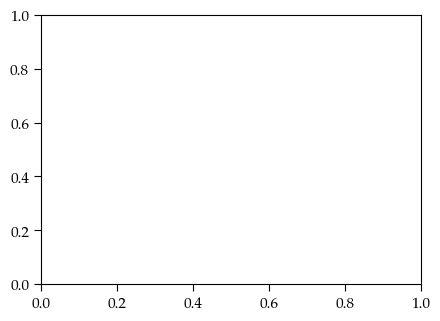

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info["cam_fps"], PSets_Eval["images"]/PSets_Info["cam_number"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kamerafrequenz in 1/s")  # Beschriftung der x-Achse
ax.set_ylabel("Bilder pro Kamera")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

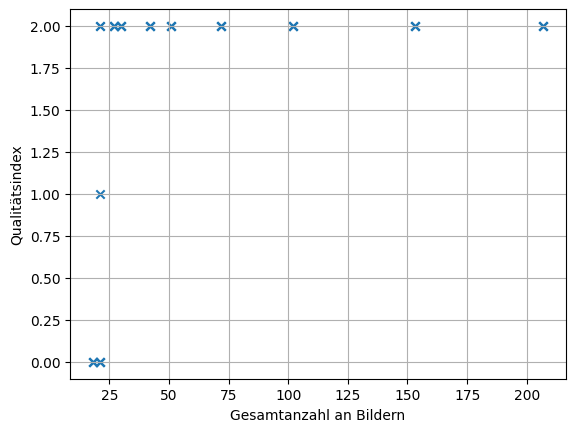

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"],PSets_Eval["quality_index"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Gesamtanzahl an Bildern")  # Beschriftung der x-Achse
ax.set_ylabel("Qualitätsindex")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

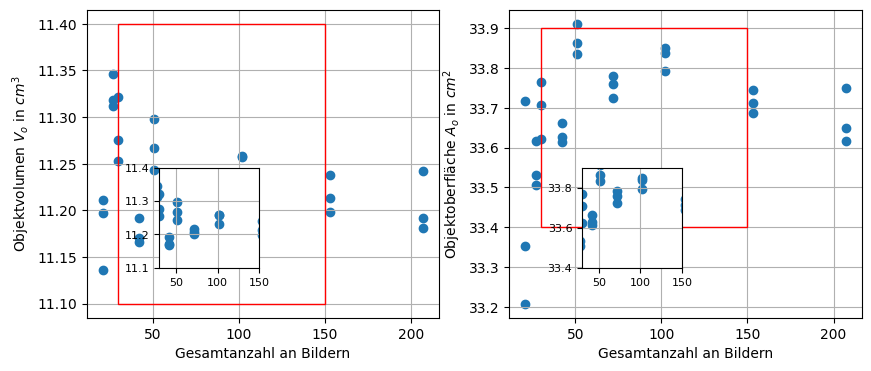

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Parameter für die Größe der Inset-Diagramme (absolut oder relativ)
inset_width = 1   # 30% der Hauptplot-Breite
inset_height = 1  # 30% der Hauptplot-Höhe

# Beispielkoordinaten für den Mittelpunkt des Inset-Plots
inset_center_x_vol = 0.01  # x-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_y_vol = 0.01  # y-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_x_surf = 0.01 # x-Koordinate des Mittelpunkts für das Oberflächen-Inset
inset_center_y_surf = 0.01# y-Koordinate des Mittelpunkts für das Oberflächen-Inset

# Parameter für die x- und y-Bereiche der Inset-Diagramme
inset_x_range_vol = (30, 150)       # x-Bereich für das Inset-Diagramm - Objektvolumen
inset_y_range_vol = (11.1, 11.4)   # y-Bereich für das Inset-Diagramm - Objektvolumen
inset_x_range_surf = (30, 150)      # x-Bereich für das Inset-Diagramm - Objektoberfläche
inset_y_range_surf = (33.4, 33.9)    # y-Bereich für das Inset-Diagramm - Objektoberfläche

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Hauptplot für Objektvolumen - zeigt gesamten Wertebereich
ax[0].scatter(PSets_Eval["images"], PSets_Eval["volume_rec"] * 10**6, marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Gesamtanzahl an Bildern")
ax[0].set_ylabel("Objektvolumen $V_o$ in $cm^3$")

# Inset-Plot für eingeschränkten Bereich - Objektvolumen mit festgelegtem Mittelpunkt
inset_ax0 = inset_axes(ax[0], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_vol - inset_width / 2,
                                       inset_center_y_vol - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[0].transAxes)
inset_ax0.scatter(PSets_Eval["images"], PSets_Eval["volume_rec"] * 10**6, marker='o')
inset_ax0.grid(True)
inset_ax0.set_xlim(inset_x_range_vol)  # Eingeschränkter x-Bereich
inset_ax0.set_ylim(inset_y_range_vol)  # Eingeschränkter y-Bereich
inset_ax0.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektvolumen
rect0 = patches.Rectangle((inset_x_range_vol[0], inset_y_range_vol[0]),
                          inset_x_range_vol[1] - inset_x_range_vol[0],
                          inset_y_range_vol[1] - inset_y_range_vol[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[0].add_patch(rect0)

# Hauptplot für Objektoberfläche - zeigt gesamten Wertebereich
ax[1].scatter(PSets_Eval["images"], PSets_Eval["surface_rec"] * 10**4, marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Gesamtanzahl an Bildern")
ax[1].set_ylabel("Objektoberfläche $A_o$ in $cm^2$")

# Inset-Plot für eingeschränkten Bereich - Objektoberfläche mit festgelegtem Mittelpunkt
inset_ax1 = inset_axes(ax[1], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_surf - inset_width / 2,
                                       inset_center_y_surf - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[1].transAxes)
inset_ax1.scatter(PSets_Eval["images"], PSets_Eval["surface_rec"] * 10**4, marker='o')
inset_ax1.grid(True)
inset_ax1.set_xlim(inset_x_range_surf)  # Eingeschränkter x-Bereich
inset_ax1.set_ylim(inset_y_range_surf)  # Eingeschränkter y-Bereich
inset_ax1.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektoberfläche
rect1 = patches.Rectangle((inset_x_range_surf[0], inset_y_range_surf[0]),
                          inset_x_range_surf[1] - inset_x_range_surf[0],
                          inset_y_range_surf[1] - inset_y_range_surf[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[1].add_patch(rect1)

plt.savefig("volume_and_surface.svg")
plt.show()


In [ ]:
PSets_Eval

NameError: name 'PSets_Eval' is not defined